In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'H:\data analysis\Kaggle\Churn Dataset.csv')

In [3]:
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [5]:
483/2850

0.1694736842105263

#### highly imbalanced data

### performing EDA

In [6]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### all values are numerical but they will need to be normalised

In [8]:
df.shape

(3333, 11)

In [9]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [10]:
df.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


In [11]:
df.cov()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,0.123951,0.231902,-0.027069,-0.016090,-0.039069,0.096681,3.934012,0.130427,0.418190,0.082858,0.067073
AccountWeeks,0.231902,1585.800121,-0.291437,0.051995,0.729328,-0.198853,13.482587,30.744868,8.229257,-0.681543,1.057726
ContractRenewal,-0.027069,-0.291437,0.087544,-0.000795,-0.007239,0.009545,-0.796051,-0.022295,-0.229842,-0.014334,-0.037891
DataPlan,-0.016090,0.051995,-0.000795,0.200165,0.538632,-0.010490,-0.041038,-0.099539,5.419791,0.024420,-0.001646
DataUsage,-0.039069,0.729328,-0.007239,0.538632,1.619684,-0.036367,0.220153,-0.203362,16.340522,0.063372,0.578249
CustServCalls,0.096681,-0.198853,0.009545,-0.010490,-0.036367,1.730517,-0.961790,-0.500080,-0.605396,-0.043245,-0.035403
DayMins,3.934012,13.482587,-0.796051,-0.041038,0.220153,-0.961790,2966.696487,7.378949,508.151281,0.972073,-1.544149
DayCalls,0.130427,30.744868,-0.022295,-0.099539,-0.203362,-0.500080,7.378949,402.768141,-2.625118,-1.091507,1.208268
MonthlyCharge,0.418190,8.229257,-0.229842,5.419791,16.340522,-0.605396,508.151281,-2.625118,269.814517,11.736030,5.385324
OverageFee,0.082858,-0.681543,-0.014334,0.024420,0.063372,-0.043245,0.972073,-1.091507,11.736030,6.429835,-0.078038


<AxesSubplot: >

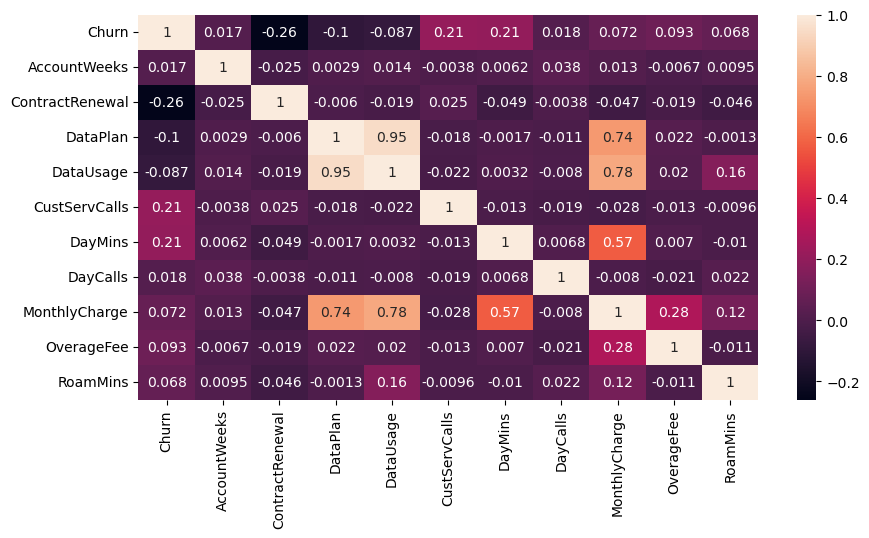

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

### No missing values , the dataset seems to be clean

<AxesSubplot: xlabel='Churn', ylabel='count'>

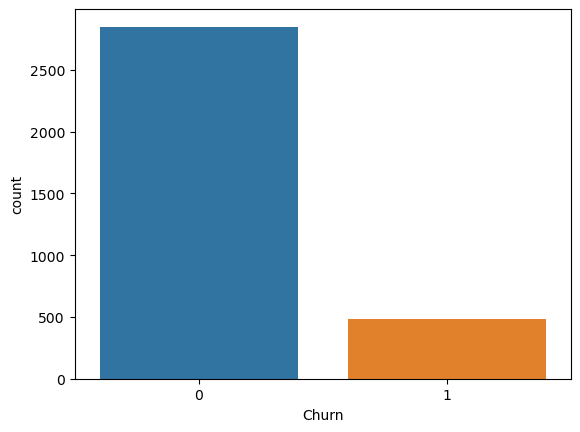

In [13]:
sns.countplot(x=df.Churn,data=df)

<AxesSubplot: xlabel='Churn', ylabel='Density'>

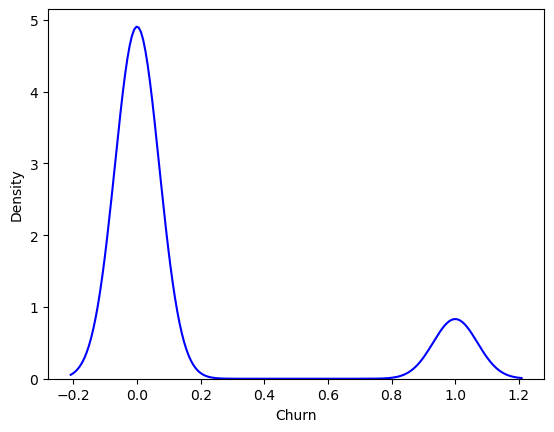

In [14]:
sns.kdeplot(df.Churn, color="blue")

<AxesSubplot: xlabel='ContractRenewal', ylabel='count'>

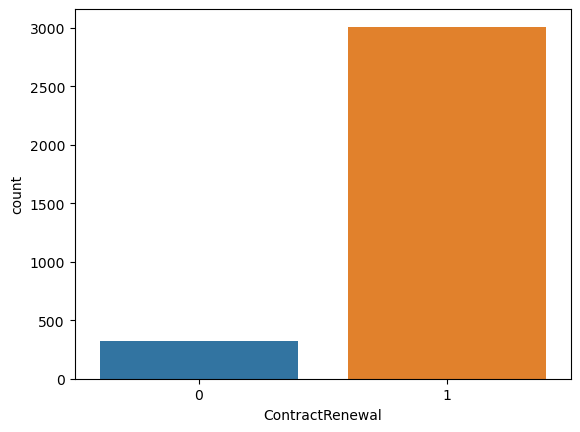

In [15]:
sns.countplot(x=df.ContractRenewal,data=df)

<AxesSubplot: xlabel='ContractRenewal', ylabel='Density'>

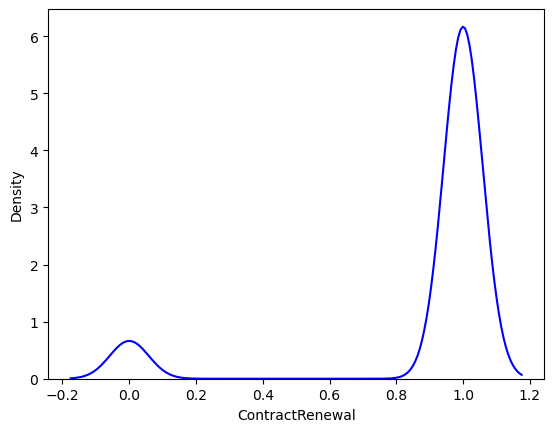

In [16]:
sns.kdeplot(df.ContractRenewal, color="blue")

<AxesSubplot: xlabel='DataPlan', ylabel='count'>

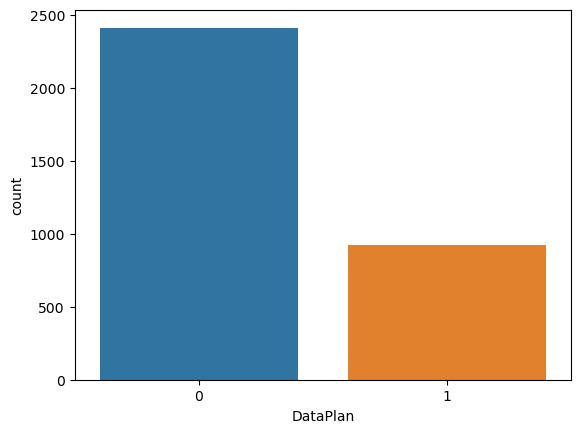

In [17]:
sns.countplot(x=df.DataPlan,data=df)

<AxesSubplot: xlabel='DataPlan', ylabel='Density'>

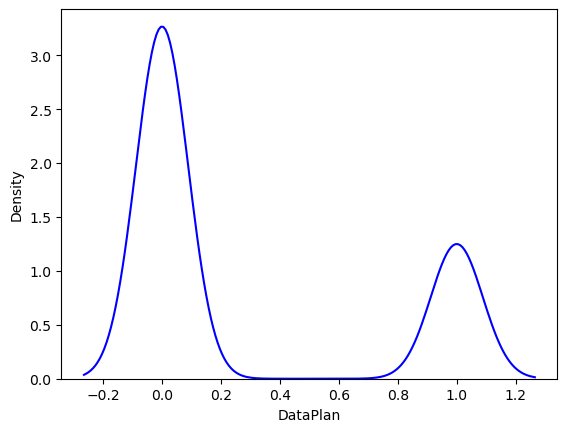

In [18]:
sns.kdeplot(df.DataPlan, color="blue")

<AxesSubplot: xlabel='CustServCalls', ylabel='count'>

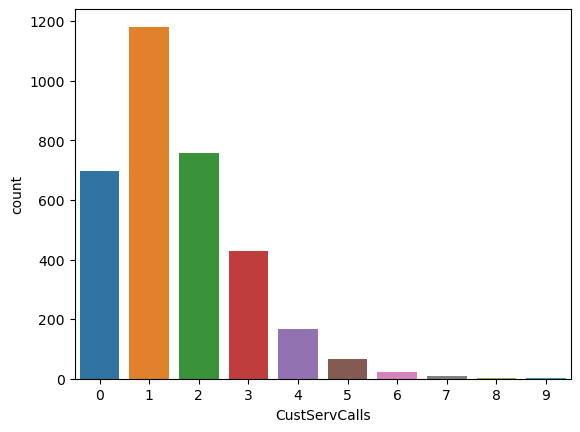

In [19]:
sns.countplot(x=df.CustServCalls,data=df)

<AxesSubplot: xlabel='CustServCalls', ylabel='Density'>

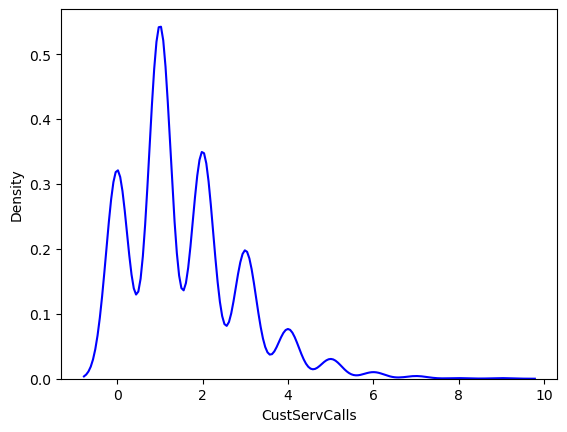

In [20]:
sns.kdeplot(df.CustServCalls, color="blue")

<AxesSubplot: xlabel='DataUsage', ylabel='count'>

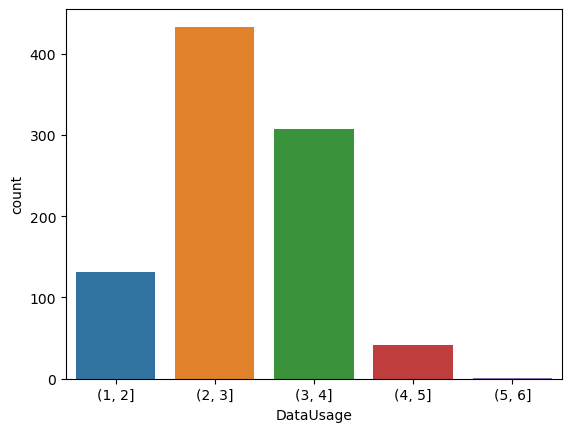

In [21]:
datausage = pd.cut(df.DataUsage,bins=[1,2,3,4,5,6])
sns.countplot(x=datausage,data=df)

<AxesSubplot: xlabel='DataUsage', ylabel='Density'>

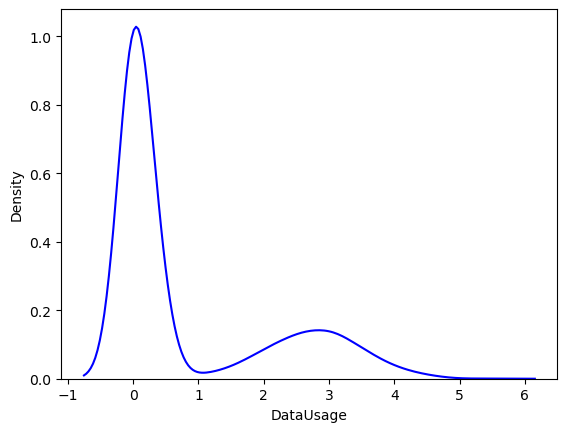

In [22]:
sns.kdeplot(df.DataUsage, color="blue")

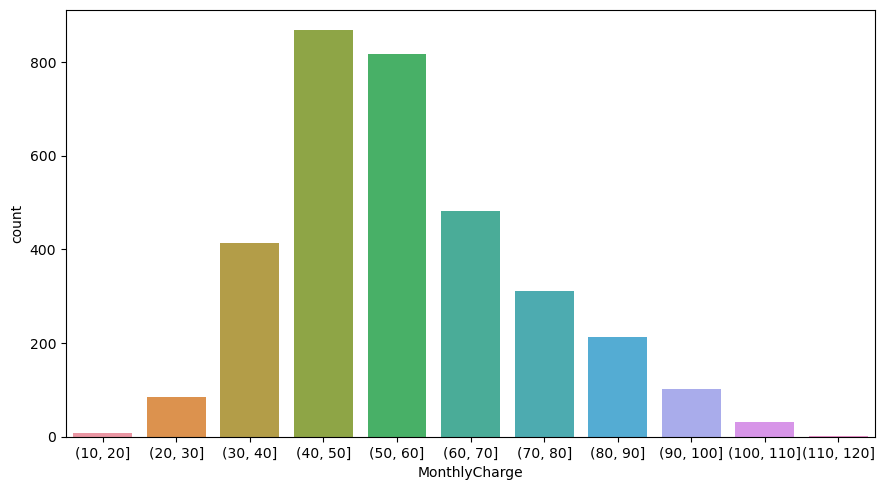

In [23]:
plt.figure(figsize=(9,5))
monthlycharge = pd.cut(df.MonthlyCharge,bins=[10,20,30,40,50,60,70,80,90,100,110,120])
sns.countplot(x=monthlycharge,data=df)
plt.tight_layout()

<AxesSubplot: xlabel='MonthlyCharge', ylabel='Density'>

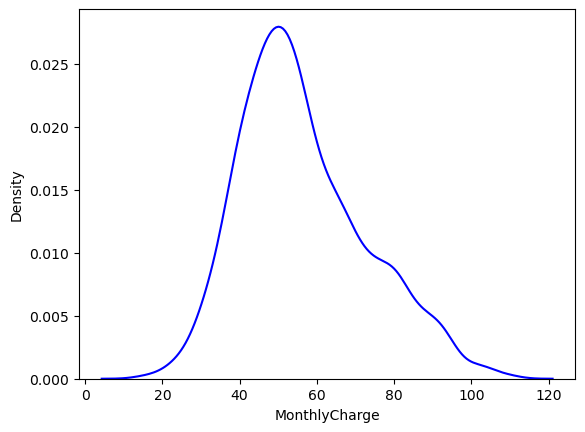

In [24]:
sns.kdeplot(df.MonthlyCharge, color="blue")

<AxesSubplot: xlabel='DayMins', ylabel='count'>

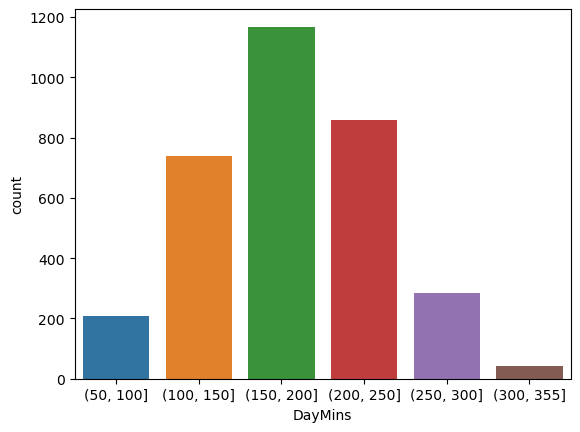

In [25]:
daymins = pd.cut(df.DayMins,bins=[50,100,150,200,250,300,355])
sns.countplot(x=daymins,data=df)

<AxesSubplot: xlabel='DayMins', ylabel='Density'>

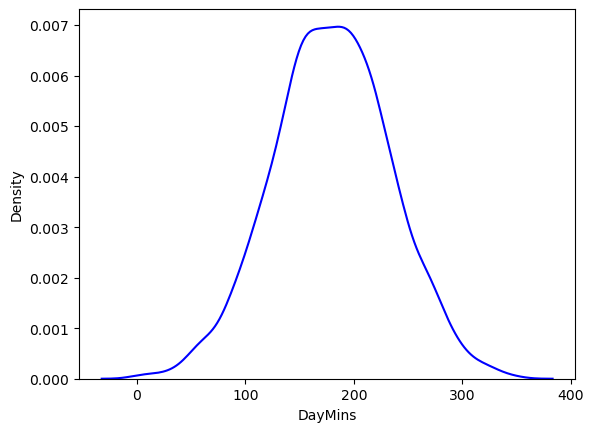

In [26]:
sns.kdeplot(df.DayMins, color="blue")

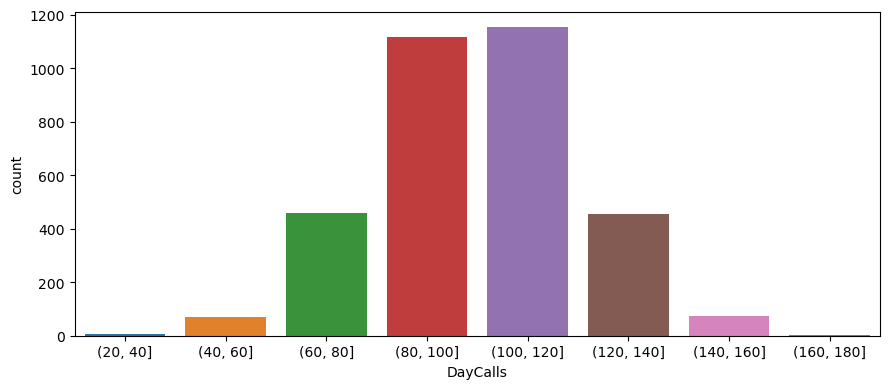

In [27]:
plt.figure(figsize=(9,4))
daycalls = pd.cut(df.DayCalls,bins=[20,40,60,80,100,120,140,160,180])
sns.countplot(x=daycalls,data=df)
plt.tight_layout()

<AxesSubplot: xlabel='DayCalls', ylabel='Density'>

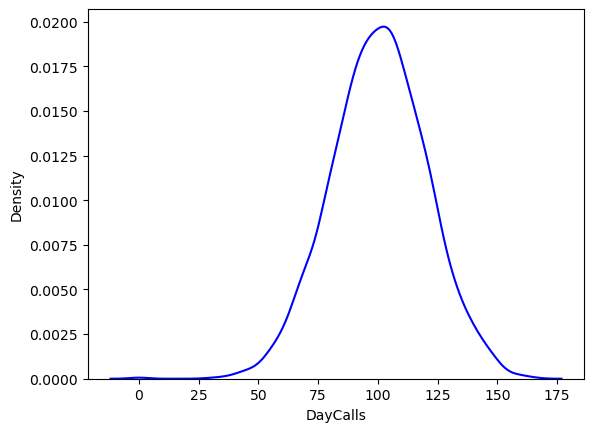

In [28]:
sns.kdeplot(df.DayCalls, color="blue")

<AxesSubplot: xlabel='AccountWeeks', ylabel='count'>

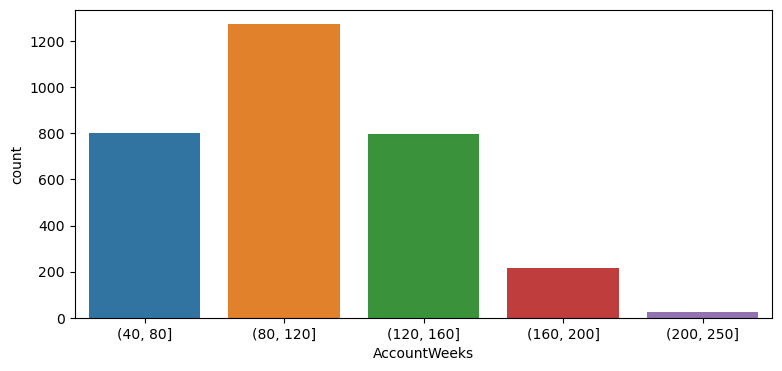

In [29]:
plt.figure(figsize=(9,4))
accountweeks = pd.cut(df.AccountWeeks,bins=[40,80,120,160,200,250])
sns.countplot(x=accountweeks,data=df)

<AxesSubplot: xlabel='AccountWeeks', ylabel='Density'>

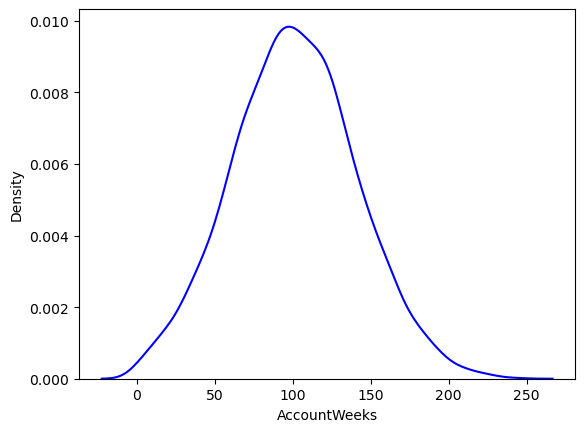

In [30]:
sns.kdeplot(df.AccountWeeks, color="blue")

<AxesSubplot: xlabel='OverageFee', ylabel='count'>

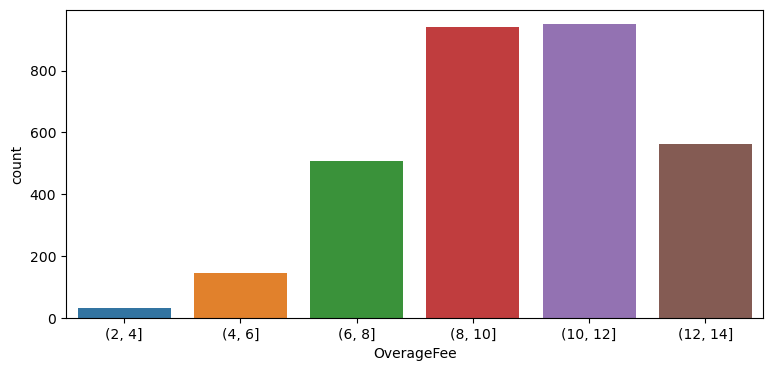

In [31]:
plt.figure(figsize=(9,4))
overagefee = pd.cut(df.OverageFee,bins=[2,4,6,8,10,12,14])
sns.countplot(x=overagefee,data=df)

<AxesSubplot: xlabel='OverageFee', ylabel='Density'>

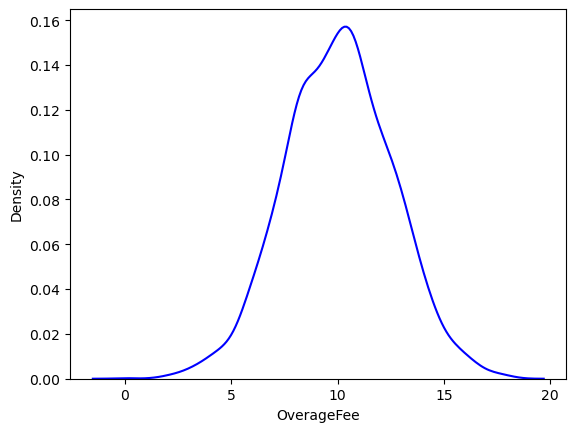

In [32]:
sns.kdeplot(df.OverageFee, color="blue")

### Except a few columns all columns have a normal distribution

## Bivariate Analysis

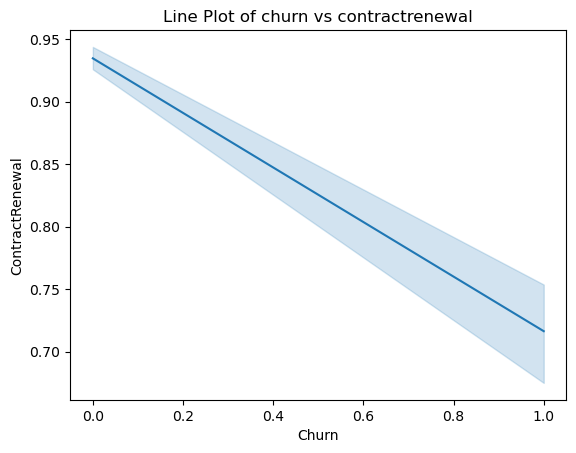

In [33]:
sns.lineplot(x=df.Churn, y=df.ContractRenewal, data=df)
plt.title('Line Plot of churn vs contractrenewal')
plt.show()


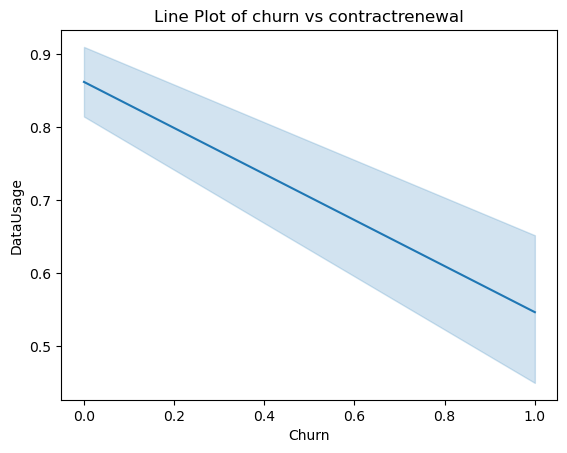

In [34]:
sns.lineplot(x=df.Churn, y=df.DataUsage, data=df)
plt.title('Line Plot of churn vs contractrenewal')
plt.show()


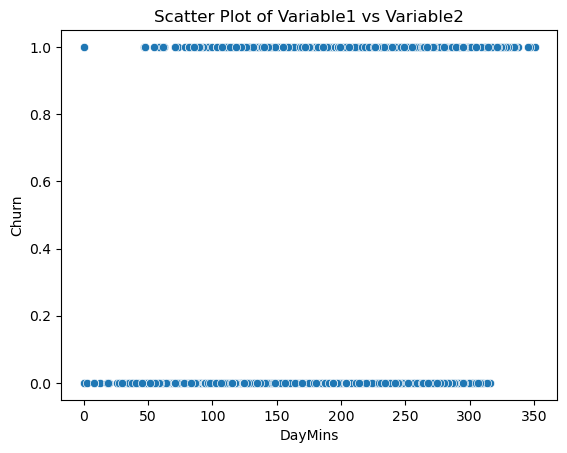

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(y=df.Churn, x=df.DayMins, data=df)
plt.title('Scatter Plot of Variable1 vs Variable2')
plt.show()


## Doing outlier detection which we missed

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')


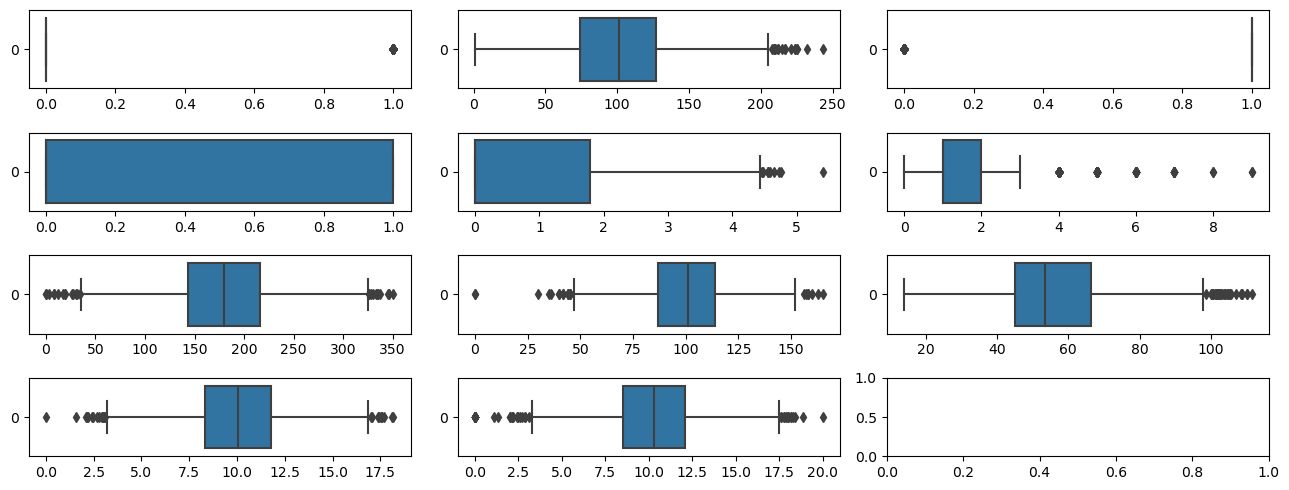

In [36]:
def boxplotting_outliers(data,nrows=1,ncolumns=1):
    fig,axes = plt.subplots(nrows,ncolumns,figsize=(13,5))
    columns_lst = data.columns
    print(columns_lst)
    for i, df in enumerate(columns_lst):
        sns.boxplot(data = data[df], orient='h',ax=axes.flatten()[i])
        plt.tight_layout()
        
boxplotting_outliers(df,nrows=4,ncolumns=3)

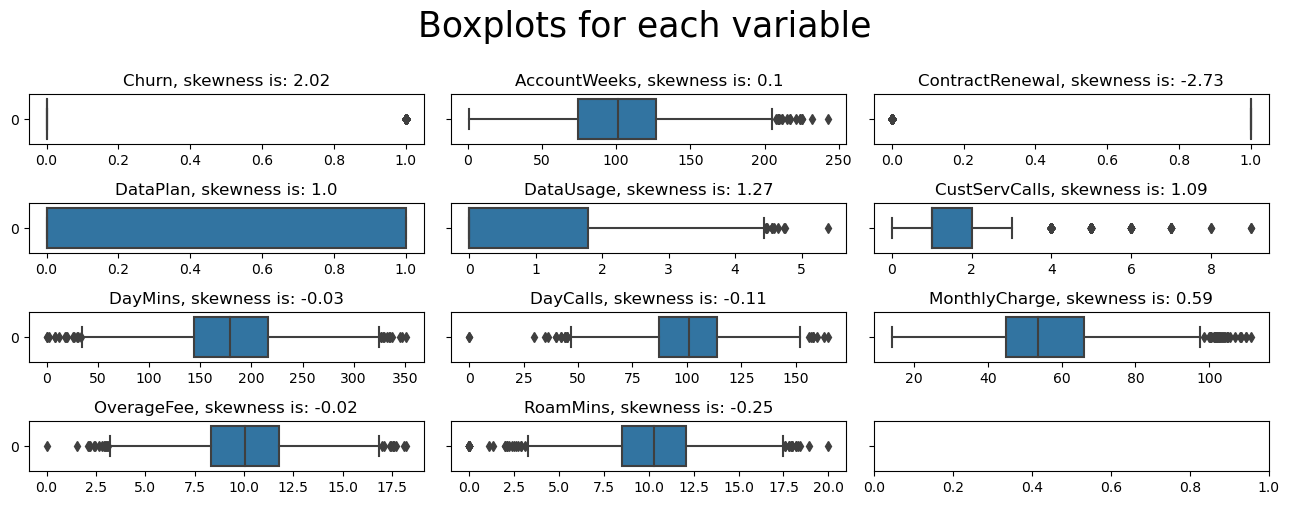

In [37]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=df.columns, rows=4, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()


### As we can see that there are outliers in almost all the columns, we need to drop these , actually since we skipped this step our models performance was hindered and even with  ensemble learning it was still plateuing around 60% in recall.
### we missed the outlier since data was almost clean and the objectives were focused on model buildings still a huge error on our part, so from here on we will also compare the differences with outlier and without outlier.

In [38]:
for i, cname in enumerate(df.columns):
    Q1 = np.percentile(df[cname],25)
    Q3 = np.percentile(df[cname],75)
    IQR = Q3 - Q1
    outliers  = ( df[cname] < (Q1 - 1.5*IQR) ) | (df[cname] > (Q3 + IQR))
    
print(df[outliers].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 115 to 3319
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            103 non-null    int64  
 1   AccountWeeks     103 non-null    int64  
 2   ContractRenewal  103 non-null    int64  
 3   DataPlan         103 non-null    int64  
 4   DataUsage        103 non-null    float64
 5   CustServCalls    103 non-null    int64  
 6   DayMins          103 non-null    float64
 7   DayCalls         103 non-null    int64  
 8   MonthlyCharge    103 non-null    float64
 9   OverageFee       103 non-null    float64
 10  RoamMins         103 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 9.7 KB
None


### 103 rows will be removed from data as they are outliers which is 0.051% of the data so small values and thus won't affect our data much.

In [39]:
df = df.drop(df[outliers].index)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3230 non-null   int64  
 1   AccountWeeks     3230 non-null   int64  
 2   ContractRenewal  3230 non-null   int64  
 3   DataPlan         3230 non-null   int64  
 4   DataUsage        3230 non-null   float64
 5   CustServCalls    3230 non-null   int64  
 6   DayMins          3230 non-null   float64
 7   DayCalls         3230 non-null   int64  
 8   MonthlyCharge    3230 non-null   float64
 9   OverageFee       3230 non-null   float64
 10  RoamMins         3230 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 302.8 KB


''' conda install imblearn''''

In [41]:
y = df.Churn
X = df.drop('Churn',axis=1)

In [42]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1)

In [43]:
print(Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape)

(2261, 10) (2261,) (969, 10) (969,)


In [44]:
ytrain.value_counts()

0    1947
1     314
Name: Churn, dtype: int64

In [45]:
ytest.value_counts()

0    816
1    153
Name: Churn, dtype: int64

### using smote to balance the data before training

In [46]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
for i in df.columns:
    df[i] = scl.fit_transform(df[i].values.reshape(-1,1))

In [47]:
df.describe().round(2)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-2.51,-3.06,-0.62,-0.65,-1.19,-3.30,-5.00,-2.60,-3.97,-2.76
25%,-0.41,-0.68,0.33,-0.62,-0.65,-0.43,-0.66,-0.67,-0.69,-0.68,-0.68
50%,-0.41,0.00,0.33,-0.62,-0.65,-0.43,-0.01,0.03,-0.16,0.01,0.03
75%,-0.41,0.65,0.33,1.62,0.80,0.33,0.67,0.68,0.62,0.68,0.73
max,2.43,3.56,0.33,1.62,2.73,5.64,3.14,3.22,3.23,3.17,2.21


In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)

In [49]:
Xtrainupdt,ytrainupdt = sm.fit_resample(Xtrain,ytrain)

In [50]:
print(Xtrainupdt.shape,ytrainupdt.shape)

(3894, 10) (3894,)


In [51]:
ytrainupdt.value_counts()

0    1947
1    1947
Name: Churn, dtype: int64

In [52]:
from sklearn.linear_model  import LogisticRegression

lr = LogisticRegression()

model = lr.fit(Xtrainupdt,ytrainupdt)
pred = model.predict(Xtest)

#also checking without SMOTE
lr1 = LogisticRegression()
mdl = lr1.fit(Xtrain,ytrain)
prd = mdl.predict(Xtest)

H:\data analysis\Anacoinstaller\INSTALLER\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
H:\data analysis\Anacoinstaller\INSTALLER\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))
print(classification_report(ytest,prd))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       816
           1       0.38      0.71      0.49       153

    accuracy                           0.77       969
   macro avg       0.66      0.75      0.67       969
weighted avg       0.85      0.77      0.79       969

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       816
           1       0.50      0.12      0.20       153

    accuracy                           0.84       969
   macro avg       0.68      0.55      0.56       969
weighted avg       0.80      0.84      0.80       969



In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred))
print(accuracy_score(ytest,prd))

0.7688338493292054
0.8421052631578947


### As we can see that the overall accuracy may have decreased from 84.8% to 75.7% , but the recall value has 
### increased from 12% to overwhelming 77% thus becoming good at identifying the churning customers

### Although the increase in learning is significant but the efficiency is still on lower side about 67%, In next steps we will try building bagging, boosting i.e., ensemble models to bump up these numbers

### Decision trees have been known to have better performance than these (Logistic Regression, Naive Bayes, Perceptron, etc) models being applied independently.

### Followed by Random Forest and other models

!pip install lazypredict

!conda install lazypredict

In [55]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(Xtrainupdt, Xtest, ytrainupdt, ytest)
print(models)

H:\data analysis\Anacoinstaller\INSTALLER\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:22<00:01,  1.20s/it]

[LightGBM] [Info] Number of positive: 1947, number of negative: 1947
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 3894, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:31<00:00,  1.10s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.89               0.83     0.83      0.89   
NuSVC                              0.85               0.82     0.82      0.86   
ExtraTreesClassifier               0.89               0.81     0.81      0.89   
LGBMClassifier                     0.88               0.81     0.81      0.89   
XGBClassifier                      0.88               0.81     0.81      0.89   
AdaBoostClassifier                 0.86               0.81     0.81      0.86   
SVC                                0.86               0.80     0.80      0.87   
QuadraticDiscriminantAnalysis      0.83               0.80     0.80      0.84   
BaggingClassifier                  0.89               0.79     0.79      0.89   
KNeighborsClassifier               0.82               0.78     0.78      0.84   
ExtraTreeClassifier         

### From above we can see that Random Forest Classifier performs the best overall for this dataset. So, we will RandomForest as our Classifier

In [85]:
help(clf)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [101]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth=3, random_state=666,oob_score=1)


RFmodel = clf.fit(Xtrainupdt, ytrainupdt)
RFpred = RFmodel.predict(Xtest)

In [102]:
from sklearn.metrics import accuracy_score

print(accuracy_score(ytrainupdt, RFmodel.predict(Xtrainupdt)))

print(accuracy_score(ytest, RFpred))


0.8697996918335902
0.8627450980392157


In [103]:
from sklearn.metrics import classification_report
print(classification_report(ytest,RFpred))
print(classification_report(ytrainupdt, RFmodel.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       816
           1       0.54      0.80      0.65       153

    accuracy                           0.86       969
   macro avg       0.75      0.84      0.78       969
weighted avg       0.89      0.86      0.87       969

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1947
           1       0.89      0.85      0.87      1947

    accuracy                           0.87      3894
   macro avg       0.87      0.87      0.87      3894
weighted avg       0.87      0.87      0.87      3894



### we are able to get 80% as our recall value, and not only that the overfitting has also been kept to minimum

In [59]:
from imblearn.under_sampling import NearMiss 
nm = NearMiss() 
  
X_train_miss, y_train_miss = nm.fit_resample(Xtrain, ytrain.ravel()) 

In [60]:
y_train_miss = pd.DataFrame(y_train_miss)
y_train_miss.value_counts()

0    314
1    314
dtype: int64

In [61]:
!pip install pydot graphviz

In [62]:
!pip install scikit-plot

In [63]:
## from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve

In [64]:
### using Stacking for ensemble learning

In [65]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

In [67]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
estimators.append(('Bernoulli NB', BernoulliNB() ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=13) ))
estimators.append(('Extra Tree Classifier', ExtraTreeClassifier(random_state=13) ))
estimators.append(('Extra Trees Classifier', ExtraTreesClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gaussian Process Classifier', GaussianProcessClassifier(random_state=13) ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('Hist Gradient Boosting Classifier', HistGradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
#estimators.append(('Label Propagation', LabelPropagation() ))
#estimators.append(('Label Spreading', LabelSpreading() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('Logistic Regression CV', LogisticRegressionCV(max_iter=1000, random_state=13) ))
estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=13) ))
estimators.append(('Nearest Centroid', NearestCentroid() ))
estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=13) ))
estimators.append(('Perceptron', Perceptron(random_state=13) ))
#estimators.append(('RadiusNeighborsClassifier', RadiusNeighborsClassifier(radius=3) ))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
estimators.append(('Ridge Classifier', RidgeClassifier(random_state=13) ))
estimators.append(('Ridge Classifier CV', RidgeClassifierCV() ))
estimators.append(('SGDClassifier', SGDClassifier(random_state=13) ))
estimators.append(('SVC', SVC(random_state=13)))
estimators.append(('XGB', XGBClassifier(random_state=13) ))

In [68]:
rfc = RandomForestClassifier(max_depth=2, random_state=666)

### Voting classifier 

In [69]:
voting = VotingClassifier(estimators=estimators)
vote = voting.fit(Xtrainupdt, ytrainupdt)
voted = vote.predict(Xtest)
print(classification_report(ytest,voted))
print(classification_report(ytrainupdt,vote.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       816
           1       0.62      0.63      0.63       153

    accuracy                           0.88       969
   macro avg       0.78      0.78      0.78       969
weighted avg       0.88      0.88      0.88       969

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1947
           1       0.99      0.85      0.91      1947

    accuracy                           0.92      3894
   macro avg       0.93      0.92      0.92      3894
weighted avg       0.93      0.92      0.92      3894



### Stacking Classifier

In [82]:
from sklearn.ensemble import StackingClassifier
SC = StackingClassifier(estimators=estimators,final_estimator=rfc,cv=2)
stacked = SC.fit(Xtrainupdt, ytrainupdt)
y_pred_stack = stacked.predict(Xtest)

print(f"\nStacking classifier training Accuracy: {SC.score(Xtrainupdt, ytrainupdt):0.2f}")
print(f"Stacking classifier test Accuracy: {SC.score(Xtest, ytest):0.2f}")


Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 0.90


In [84]:
print(classification_report(ytest,y_pred_stack))
print(classification_report(ytrainupdt,stacked.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       816
           1       0.70      0.64      0.67       153

    accuracy                           0.90       969
   macro avg       0.82      0.79      0.80       969
weighted avg       0.90      0.90      0.90       969

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1947
           1       1.00      1.00      1.00      1947

    accuracy                           1.00      3894
   macro avg       1.00      1.00      1.00      3894
weighted avg       1.00      1.00      1.00      3894



In [72]:
SC_roc_auc = roc_auc_score(ytest, y_pred_stack)

cm = confusion_matrix(ytest, y_pred_stack)
print(cm)

[[778  38]
 [ 57  96]]


In [73]:
#SC_roc_auc

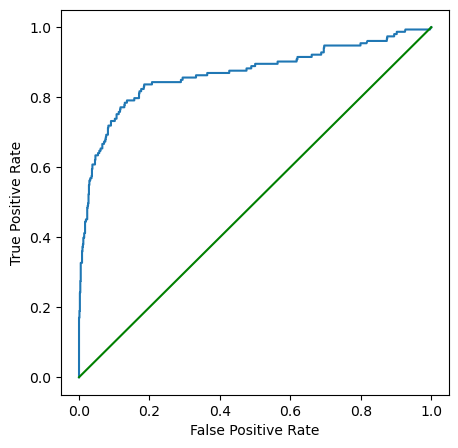

In [74]:
y_proba = SC.predict_proba(Xtest)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(ytest, y_pred_stack):
    fpr, tpr, _ = roc_curve(ytest, y_pred_stack)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
plot_auc_roc_curve(ytest, y_proba[:, 1])

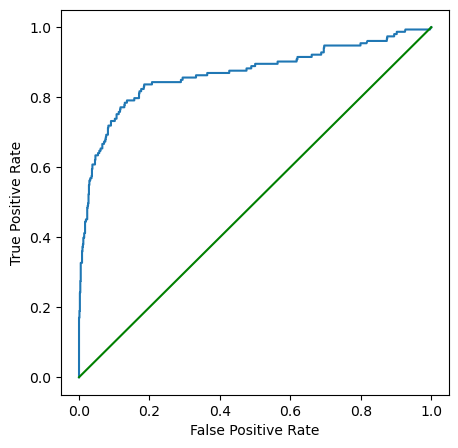

In [75]:
# Import necessary libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

# Define a function to plot the AUC-ROC curve
def plot_auc_roc_curve(ytest, y_pred):
    # Compute false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, _ = roc_curve(ytest, y_pred)
    
    # Plot the ROC curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    
    # Set the size of the figure
    roc_display.figure_.set_size_inches(5, 5)
    
    # Plot the diagonal line (y=x) for reference
    plt.plot([0, 1], [0, 1], color='green')

# Call the function to plot the AUC-ROC curve
plot_auc_roc_curve(ytest, y_proba[:, 1])


In [76]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=33)
ada_boost = ada_boost_clf.fit(Xtrainupdt, ytrainupdt)
boost = ada_boost_clf.predict(Xtest)
print(classification_report(ytest,boost))
print(classification_report(ytrainupdt,ada_boost.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       816
           1       0.55      0.75      0.63       153

    accuracy                           0.86       969
   macro avg       0.75      0.82      0.77       969
weighted avg       0.89      0.86      0.87       969

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1947
           1       0.90      0.86      0.88      1947

    accuracy                           0.88      3894
   macro avg       0.88      0.88      0.88      3894
weighted avg       0.88      0.88      0.88      3894



In [77]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad = grad_boost_clf.fit(Xtrainupdt, ytrainupdt)
grad_pred = grad.predict(Xtest)
print(classification_report(ytest,grad_pred))
print(classification_report(ytrainupdt,grad.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       816
           1       0.61      0.80      0.69       153

    accuracy                           0.89       969
   macro avg       0.78      0.85      0.81       969
weighted avg       0.90      0.89      0.89       969

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1947
           1       0.93      0.90      0.92      1947

    accuracy                           0.92      3894
   macro avg       0.92      0.92      0.92      3894
weighted avg       0.92      0.92      0.92      3894



### So, here we can see gradient Boosting has performed the best without overfitting, where rest of the models overfitted and thus require hyper parameter finetuning. while GBoosting model here can be used as is.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3230 non-null   float64
 1   AccountWeeks     3230 non-null   float64
 2   ContractRenewal  3230 non-null   float64
 3   DataPlan         3230 non-null   float64
 4   DataUsage        3230 non-null   float64
 5   CustServCalls    3230 non-null   float64
 6   DayMins          3230 non-null   float64
 7   DayCalls         3230 non-null   float64
 8   MonthlyCharge    3230 non-null   float64
 9   OverageFee       3230 non-null   float64
 10  RoamMins         3230 non-null   float64
dtypes: float64(11)
memory usage: 302.8 KB


In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define preprocessing steps
preprocessing_steps = Pipeline(steps=[
    ("Scaling", StandardScaler()),
    ("Balancing the data", SMOTE(random_state=666))
])

# Define models
logistic_model = LogisticRegression()
adaboost_model = AdaBoostClassifier()


# Define the pipeline with both models
pipeline = Pipeline(steps=[
    ("Preprocessing", preprocessing_steps),
    ("Logistic Regression", logistic_model),
    ("AdaBoost", adaboost_model),
    ("Random Forest Classifier",clf)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# Fit the pipeline on the training data
pipeline = pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'Pipeline(steps=[('Scaling', StandardScaler()),
                ('Balancing the data', SMOTE(random_state=666))])' (type <class 'sklearn.pipeline.Pipeline'>) doesn't